In [54]:
import numpy as np
import pandas as pd

In [55]:
df = pd.read_csv("startup_funding.csv")
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [56]:
# Dropping `Renarks` column - 90% data is missing
df.drop(columns = ['Remarks'], axis = 0, inplace = True)

In [57]:
# Making `Sr No` as a primary index
df.set_index('Sr No', inplace = True)

In [58]:
# Renaming Column as per our convenience
df.rename(columns = {
    'Date dd/mm/yyyy':'date',
    'Startup Name':'startup',
    'Industry Vertical':'vertical',
    'SubVertical':'subvertical',
    'City  Location':'city',
    'Investors Name':'investors',
    'InvestmentnType':'round',
    'Amount in USD':'amount'
}, inplace = True)

In [59]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [60]:
# There are missing values in amount column - Filling them as 0 
df['amount'] = df['amount'].fillna(value = '0')
# The records where the amount value is menioned by 0 is undisclosed in my pov

In [61]:
df['amount'] = df['amount'].str.replace('undisclosed', '0')
df['amount'] = df['amount'].str.replace('unknown', '0')
df['amount'] = df['amount'].str.replace('Undisclosed', '0')
df['amount'] = df['amount'].str.replace(',', '')

In [62]:
df = df[df['amount'].str.isdigit()] # Because there are some values like -> 14342000+ we cannot able to deal with this data

In [63]:
df['amount'] = df['amount'].astype(np.float64)
df['amount'].head()

Sr No
1    200000000.0
2      8048394.0
3     18358860.0
4      3000000.0
5      1800000.0
Name: amount, dtype: float64

In [64]:
# Converting US dollars to INR cr
df['amount'] = df['amount'].map(lambda X: X * 82.5 / 10000000)

In [65]:
# Converting datatype of date column from object to datetime
df['date'] = pd.to_datetime(df['date'], errors = 'coerce') # because there is lot of uncleaned dateformat present in this column

In [66]:
df.isnull().sum()

date           1746
startup           0
vertical        171
subvertical     925
city            180
investors        24
round             2
amount            0
dtype: int64

In [67]:
df = df.dropna(how = 'any', axis = 0, subset = ['vertical', 'city', 'investors', 'round']) # There are huge amount of missing values in date and subvertical column

---

In [68]:
all_investors = []
def preprocess_investors(investors: str) -> list:
    lst = investors.lower().split(", ")

    # Removing unwanted things
    temp = []
    for investor in lst:
        processed = "".join([c for c in investor if c.isalnum() or c == " "])
        temp.append(processed.strip())
    all_investors.append(temp)

df['investors'].apply(preprocess_investors)
df['investors'] = all_investors
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,[tiger global management],Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,[susquehanna growth equity],Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[sequoia capital india],Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[vinod khatumal],Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[sprout venture partners],Seed Round,14.850000


In [69]:
def recent_investment(investor: str) -> pd.DataFrame:
    return df[df['investors'].map(lambda x: investor in x)]

recent_investment('sequoia capital india')

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[sequoia capital india],Series B,151.460595
69,2019-11-07,Moglix,E-Commerce,Industrial Tools and Equipments,Singapore,"[composite capital management, sequoia capital...",Series D,495.000000
150,2018-12-10,Blackbuck,Logistics Tech,Largest Trucking Platform,Bengaluru,[sequoia capital india],Private Funding,121.110000
232,2018-07-06,Meesho,Consumer Internet,Online Marketplace For Resellers,Bengaluru,"[sequoia capital india, saif partners, y combi...",Private Equity,94.875000
392,2018-02-01,CleverTap,Technology,Mobile App Analytics,Mumbai,"[recruit holdings, sequoia capital india, acce...",Angel / Seed Funding,0.000000
583,2017-06-09,OncoStem,Healthcare,Medical Diagnostic Solutions,Bangalore,"[sequoia capital india, artiman ventures]",Private Equity,49.500000
587,2017-07-09,OYO Rooms,Consumer Internet,Branded budget hotels marketplace,Gurgaon,"[softbank group, sequoia capital india, lights...",Private Equity,2062.500000
602,NaT,Unacademy,Consumer Internet,Online learning platform,Mumbai,"[sequoia capital india, saif partners, nexus v...",Private Equity,94.875000
665,NaT,Dhruva,Technology,Cloud data protection and management solutions,Pune,"[riverwood capital, sequoia capital india, nex...",Private Equity,660.000000


In [70]:
def biggest_investments(investor: str) -> pd.DataFrame:
    all_investments = recent_investment(investor)
    return all_investments.sort_values(by = 'amount', ascending = False).head()

biggest_investments("sequoia capital india")

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
587,2017-07-09,OYO Rooms,Consumer Internet,Branded budget hotels marketplace,Gurgaon,"[softbank group, sequoia capital india, lights...",Private Equity,2062.50
665,NaT,Dhruva,Technology,Cloud data protection and management solutions,Pune,"[riverwood capital, sequoia capital india, nex...",Private Equity,660.00
69,2019-11-07,Moglix,E-Commerce,Industrial Tools and Equipments,Singapore,"[composite capital management, sequoia capital...",Series D,495.00
1189,2016-02-11,FreshDesk,Consumer Internet,SAAS Based HelpDesk Services,Chennai,"[sequoia capital india, accel partners]",Private Equity,453.75
1301,NaT,DailyHunt,Consumer Internet,Vernacular content mobile app,Bangalore,"[bytedance, arun sarin, matrix partners, sequo...",Private Equity,206.25


In [71]:
def investor_sector_distribution(investor: str):
    all_investments = recent_investment(investor)
    grouped_obj =  all_investments.groupby(by = 'vertical')['amount'].count()
    return ((grouped_obj / grouped_obj.sum()) * 100).round(decimals = 2)
    
investor_sector_distribution("sequoia capital")

vertical
App based Bus Pooling Services                 1.67
Banking Analytics Platform                     1.67
Budget Hotel Accommodation                     1.67
Business Messaging App                         1.67
Clinical Genomics Provider                     1.67
Cloud software solutions                       1.67
Consumer Internet                             18.33
Credit Card Fraud protection solutions         1.67
Digital / Mobile Wallet                        1.67
Doctor Appointment booking app                 1.67
E-Commerce                                     3.33
ECommerce                                      3.33
Education                                      3.33
Ethnic Product eCommerce                       1.67
Fashion Ecommerce store                        1.67
Food & Beverage                                3.33
Food Discovery & Delivery Mobile app           1.67
Global Healthcare products                     1.67
Home Furnishing Solutions                      1.67
Hyp

In [72]:
def investor_stage_distribution(investor: str):
    all_investments = recent_investment(investor)
    grouped_obj =  all_investments.groupby(by = 'round')['amount'].count()
    return ((grouped_obj / grouped_obj.sum()) * 100).round(decimals = 2)
    
investor_stage_distribution("sequoia capital")

round
Private Equity    93.33
Seed Funding       5.00
Series D           1.67
Name: amount, dtype: float64

In [73]:
def investor_city_distribution(investor: str):
    all_investments = recent_investment(investor)
    grouped_obj =  all_investments.groupby(by = 'city')['amount'].count()
    return ((grouped_obj / grouped_obj.sum()) * 100).round(decimals = 2)
    
investor_city_distribution("sequoia capital")

city
Ahmedabad     1.67
Bangalore    35.00
Bengaluru     8.33
Gurgaon      18.33
Gurugram      1.67
Jaipur        1.67
Mumbai       20.00
New Delhi    13.33
Name: amount, dtype: float64

In [74]:
# Year on Year investment
def yoy_investment(investor: str):
    all_investments = recent_investment(investor)
    grouped_obj =  all_investments.groupby(by = all_investments['date'].dt.year)['amount'].sum().to_frame()
    grouped_obj.index = grouped_obj.index.astype(np.int64)
    return grouped_obj

yoy_investment("sequoia capital india")

,amount
date,
2016,552.750000
2017,2194.500000
2018,215.985000
2019,495.000000
2020,151.460595


---

In [75]:
# Total Amount Raised
df['amount'].sum().round(decimals = 2)

296496.99

In [76]:
# Max Amount Raised
df['amount'].max().round(decimals = 2)

32175.0

In [77]:
# The company who raised largest amount among all the startups
df[df['amount'] == df['amount'].max()].reset_index()['startup'][0]

'Rapido Bike Taxi'

In [78]:
# Avg amount Raised
(df['amount'].sum() / df['startup'].nunique()).round(decimals = 2)

128.91

In [79]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,[tiger global management],Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,[susquehanna growth equity],Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[sequoia capital india],Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[vinod khatumal],Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[sprout venture partners],Seed Round,14.850000


In [80]:
df['startup'].value_counts().sort_values()

startup
Splitkart                  1
New Castle Technologies    1
My Forex Eye               1
TruxApp                    1
CroFarm                    1
                          ..
UrbanClap                  6
Medinfi                    6
Meesho                     6
Ola Cabs                   8
Swiggy                     8
Name: count, Length: 2300, dtype: int64

In [81]:
df['amount'].describe()

count     2823.000000
mean       105.029045
std        853.305503
min          0.000000
25%          0.000000
50%          4.125000
75%         33.000000
max      32175.000000
Name: amount, dtype: float64

In [82]:
# Month by Month chart of total amount and total funding counts
def mom_total_funding():
    # Creating year and month column
    temp_df = df.copy()
    temp_df['year'] = df['date'].dt.year
    temp_df['month'] = df['date'].dt.month

    # Grouping
    grouped_obj = temp_df.groupby(by = ['year', 'month'], sort = True)
    total_funding = grouped_obj['amount'].sum().to_frame()
    count_funding = grouped_obj['amount'].count()

    total_funding['count'] = count_funding
    return total_funding

mom_tf = mom_total_funding()
mom_tf   

amount  count
year   month                    
2015.0 1.0    5274.637500     35
       2.0    1567.178250     14
       3.0    1910.658750     36
       4.0    1936.646250     21
       5.0     817.863750     22
...                   ...    ...
2019.0 11.0   1153.350000      5
       12.0   1233.375000      5
2020.0 2.0      39.600000      2
       9.0    1801.460595      2
       10.0   1237.500000      1

[62 rows x 2 columns]

In [83]:
# Sector Analysis Pie -> top sectors(Count + Sum)
(df.groupby(by = 'round')['amount'].sum() / df['amount'].sum()) * 100

round
Angel                           0.000403
Angel / Seed Funding            0.003714
Angel Funding                   0.000000
Angel Round                     0.000889
Bridge Round                    0.000000
Corporate Round                 0.105957
Debt Funding                    0.396005
Debt and Preference capital     0.017588
Debt-Funding                    0.013912
Equity                          0.281032
Equity Based Funding            0.086257
Funding Round                   2.782490
Inhouse Funding                 0.006799
Maiden Round                    0.012521
Mezzanine                       0.002782
Pre Series A                    0.000000
Pre-Series A                    0.021904
Pre-series A                    0.008347
Private                         0.043685
Private Equity                 69.015200
Private Equity Round            1.407940
Private Funding                 0.040847
PrivateEquity                   0.041737
Seed                            0.146915
Seed / Ang

In [84]:
(df.groupby(by = 'round')['amount'].count() / df.shape[0]) * 100

round
Angel                           0.035423
Angel / Seed Funding            0.283386
Angel Funding                   0.035423
Angel Round                     0.035423
Bridge Round                    0.035423
Corporate Round                 0.070847
Debt Funding                    0.814736
Debt and Preference capital     0.035423
Debt-Funding                    0.035423
Equity                          0.070847
Equity Based Funding            0.035423
Funding Round                   0.035423
Inhouse Funding                 0.035423
Maiden Round                    0.035423
Mezzanine                       0.035423
Pre Series A                    0.035423
Pre-Series A                    0.141693
Pre-series A                    0.035423
Private                         0.035423
Private Equity                 44.668792
Private Equity Round            0.141693
Private Funding                 0.035423
PrivateEquity                   0.035423
Seed                            0.141693
Seed / Ang

In [85]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,[tiger global management],Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,[susquehanna growth equity],Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[sequoia capital india],Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[vinod khatumal],Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[sprout venture partners],Seed Round,14.850000


In [86]:
temp_grouped = df.groupby(by = [df['date'].dt.year, df['date'].dt.month])
temp_grouped.agg({
    'startup': ['count', 'sum'],
    'investors': ['count']
})

startup                                                     \
              count                                                sum   
date   date                                                              
2015.0 1.0       35  CollegeDekhoBlack White Orange BrandsBiteclubP...   
       2.0       14  RoomsToniteKaaryahTwiglyCityFloShopalystHolaCh...   
       3.0       36  AnakageEasyKhaanaShuttlEckovationFitcircleFind...   
       4.0       21  ApplopCaRPMNDTV Wedding portalSplitkartShirsa ...   
       5.0       22  BookMyBaiMyIndianStayBobbleNykaaVoyllaIndiaLen...   
...             ...                                                ...   
2019.0 11.0       5               Rein GameseBikeGoMoglixSetuCleverTap   
       12.0       5                 EcozenSuperGamingMeeshoMedlifeAzah   
2020.0 2.0        2                 https://www.wealthbucket.in/Fashor   
       9.0        2                                    BYJU’SMamaearth   
       10.0       1                                             Zomato   

            investors  
                count  
date   date            
2015.0 1.0         35  
       2.0         14  
       3.0         36  
       4.0         21  
       5.0         22  
...               ...  
2019.0 11.0         5  
       12.0         5  
2020.0 2.0          2  
       9.0          2  
       10.0         1  

[62 rows x 3 columns]

In [87]:
temp_grouped['amount'].mean().unstack().stack()

date    date
2015.0  1.0      150.703929
        2.0      111.941304
        3.0       53.073854
        4.0       92.221250
        5.0       37.175625
                   ...     
2019.0  11.0     230.670000
        12.0     246.675000
2020.0  2.0       19.800000
        9.0      900.730298
        10.0    1237.500000
Length: 62, dtype: float64

In [88]:
temp_dict = {}
for (year, month), tmp_df in temp_grouped:
    temp_dict[(year, month)] = df

In [89]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,[tiger global management],Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,[susquehanna growth equity],Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[sequoia capital india],Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[vinod khatumal],Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[sprout venture partners],Seed Round,14.850000


In [94]:
# Top Startups - Based on how many times they have raised the funding | How much money they have raised
df.groupby(by = 'startup')['amount'].count().sort_values(ascending = False)

startup
Swiggy        8
Ola Cabs      8
UrbanClap     6
Nykaa         6
Medinfi       6
             ..
HeadOut       1
Hasura        1
HashTaag      1
Haqdarshak    1
zippserv      1
Name: amount, Length: 2300, dtype: int64

In [95]:
df.groupby(by = 'startup')['amount'].sum().sort_values(ascending = False)

startup
Flipkart            33492.5250
Rapido Bike Taxi    32175.0000
Paytm               25978.8375
Ola                  8122.1250
Udaan                7177.5000
                       ...    
ScoutMyTrip             0.0000
GoFynd                  0.0000
GoComet                 0.0000
SecururAX               0.0000
BabyonBoard             0.0000
Name: amount, Length: 2300, dtype: float64

In [101]:
# Top Investors - How many times they have invested | How many different startups they have invested | How much money they have invested
top_investors = {}
all_investors_lst = set()
for lst in all_investors:
    for invs in lst:
        all_investors_lst.add(invs)
all_investors_lst = list(all_investors_lst)

for investor in all_investors_lst:
    for row in df['investors']:
        if investor in row:
            if investor in top_investors:
                top_investors[investor] += 1
            else:
                top_investors[investor] = 1
top_investors

{'pine brook': 1,
 'jitu virwani': 1,
 'mukesh bansal': 1,
 'nea ventures': 1,
 'marico innovation foundation mif': 1,
 'fintech': 1,
 'geniee': 1,
 'lightstreet': 1,
 'gree ventures': 4,
 'satyen kothari': 1,
 'gund investment': 1,
 'steadview capital and existing investors': 1,
 'jacqueline fernandez': 1,
 'sabre partners and neoplux': 1,
 'bertelsmann india': 4,
 'rishi parti': 2,
 'kunal bahl': 12,
 'rajasthan angel innovators network': 2,
 'incubation foundation siif': 1,
 'ajay relan': 3,
 'neha vats': 1,
 'gvfl': 3,
 'sherpa capital': 1,
 'pbs srinivas': 1,
 'innov8': 1,
 'dr apoorv ranjan sharma': 2,
 'edelweiss financial services': 1,
 'ronnie screwvala': 1,
 'abhinav gupta': 1,
 'blue cloud ventures': 1,
 'susquehanna growth equity': 1,
 'accel partners and saama capital': 1,
 'meher roy': 1,
 'capillary technologies': 1,
 'sarath sura': 2,
 'experian': 1,
 'imanpreet singh arora': 1,
 'prashant puri': 1,
 'yatin kumar jain': 1,
 'tracxn labs  others': 1,
 'ajay data': 1,
 'd

In [107]:
for key, value in top_investors.items():
    if value == max(top_investors.values()):
        print(key)
        break

undisclosed investors


In [110]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,[tiger global management],Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,[susquehanna growth equity],Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,[sequoia capital india],Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,[vinod khatumal],Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,[sprout venture partners],Seed Round,14.850000


In [114]:
# How many different startups
investors_and_startups = {}
for i in df.index:
    for investor in df.loc[i, 'investors']:
        if investor not in investors_and_startups:
            investors_and_startups[investor] = set([df.loc[i, 'startup']])
        else:
            investors_and_startups[investor].add(df.loc[i, 'startup'])
investors_and_startups

{'tiger global management': {'BYJU’S',
  'BlackBuck',
  'Chaayos',
  'CleverTap',
  'Cube26',
  'Delhivery',
  'Grey Orange',
  'INDwealth',
  'LocalOye',
  'Lybrate',
  'Moglix',
  'OkCredit',
  'Razorpay',
  'Saavn',
  'Shopclues',
  'Vedantu',
  'Zenoti',
  'Zo Rooms'},
 'susquehanna growth equity': {'Shuttl'},
 'sequoia capital india': {'Belong',
  'Blackbuck',
  'CleverTap',
  'DailyHunt',
  'Dhruva',
  'Faasos',
  'FreshDesk',
  'HealthKart',
  'Mamaearth',
  'Meesho',
  'Moglix',
  'OYO Rooms',
  'OncoStem',
  'Pocket Aces',
  'Unacademy'},
 'vinod khatumal': {'https://www.wealthbucket.in/'},
 'sprout venture partners': {'Fashor'},
 'chiratae ventures': {'HealthifyMe', 'Pando'},
 'ant financial': {'Paytm', 'Zomato'},
 'sathguru catalyzer advisors': {'Ecozen'},
 'ping an global voyager fund': {'CarDekho'},
 'mumbai angels': {'AppsDaily',
  'Azuro',
  'Babychakra',
  'Betaout',
  'BookEventz',
  'Dhruva Space',
  'DoSelect',
  'FalconBrick',
  'Fitpass',
  'Frsh',
  'Gingercrush',

In [115]:
investors_and_startups_count = {key: len(value) for key, value in investors_and_startups.items()}
investors_and_startups_count

{'tiger global management': 18,
 'susquehanna growth equity': 1,
 'sequoia capital india': 15,
 'vinod khatumal': 1,
 'sprout venture partners': 1,
 'chiratae ventures': 2,
 'ant financial': 2,
 'sathguru catalyzer advisors': 1,
 'ping an global voyager fund': 1,
 'mumbai angels': 17,
 'ravikanth reddy': 1,
 'saif partners': 35,
 'spring canter investment ltd': 1,
 'paytm': 9,
 'nptk': 1,
 'sabre partners and neoplux': 1,
 'vertex growth fund': 1,
 'ruizheng investment': 1,
 'manipal education and medical group memg': 2,
 'softbank vision fund': 4,
 'sequoia': 2,
 'capitalg': 3,
 'accel': 3,
 'saucevc': 1,
 'rainforest ventures': 1,
 'prime venture partners': 9,
 'letsventure': 21,
 'ps1 venture and globallogic cofounder rajul garg': 1,
 'rb investments': 12,
 'dg daiwa ventures': 1,
 'dg incubation': 1,
 'trifecta capital advisors': 1,
 'fintech': 1,
 'dream incubator': 3,
 'altimeter capital': 4,
 'sutter hill ventures': 1,
 'startup buddy': 2,
 'amour infrastructure': 1,
 'ackermans

In [92]:
# City wise funding - Done already

<Axes: xlabel='date', ylabel='startup'>

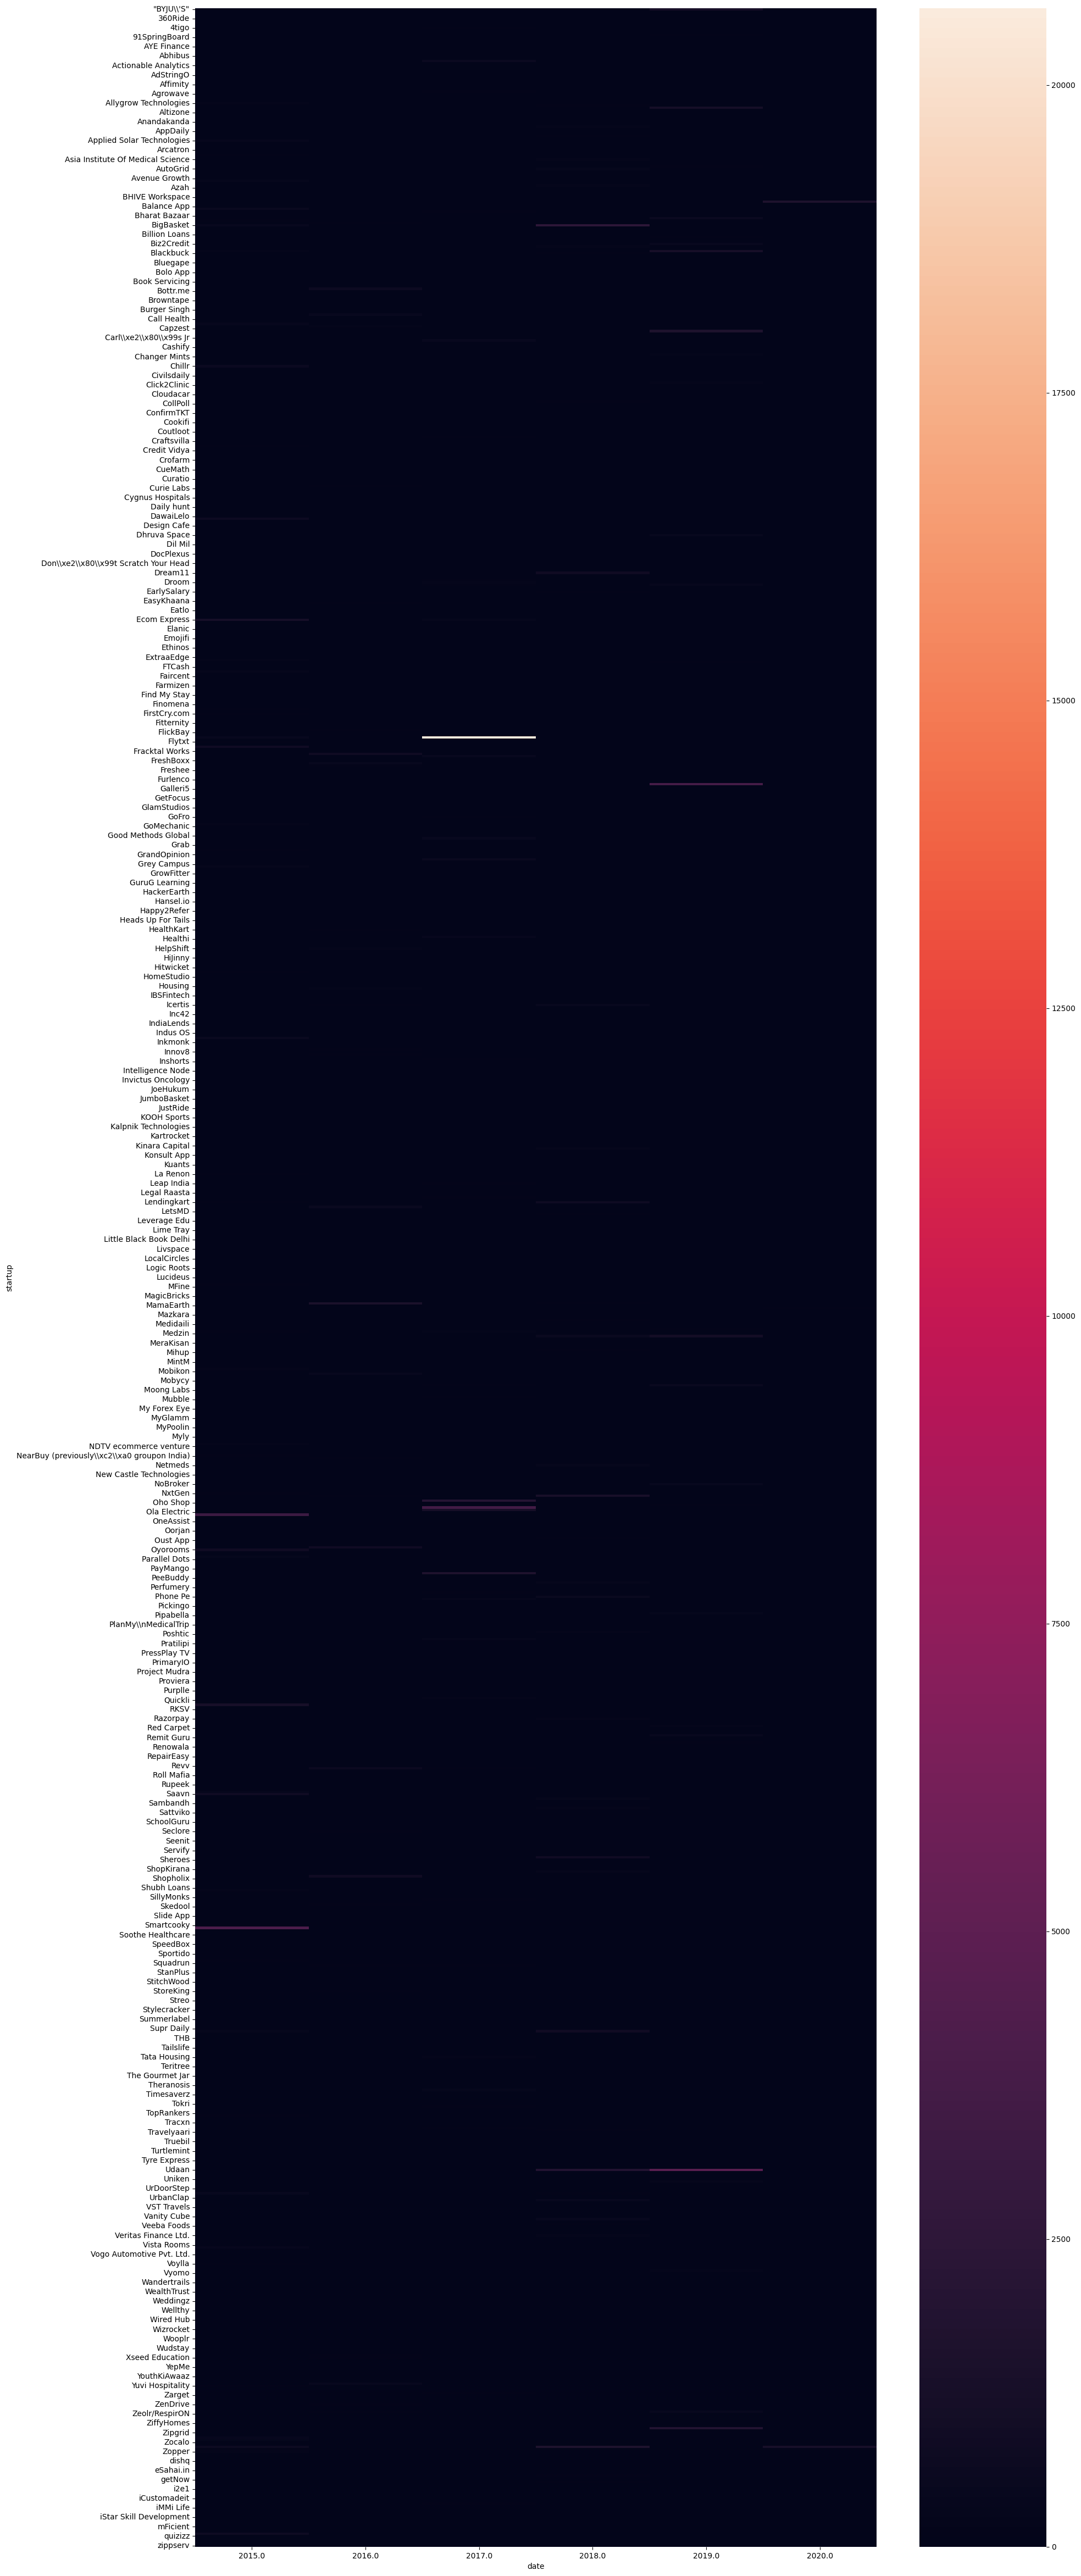

In [122]:
# Funding Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 60))
sns.heatmap(df.pivot_table(index = 'startup', columns = df['date'].dt.year, values = 'amount', aggfunc = 'sum').fillna(0))